In [6]:
import numpy as np
from scipy.optimize import leastsq
from matplotlib import pyplot as plt
%matplotlib inline

In [13]:
def fit_func(p, x):
    """根据公式，定义 n 次多项式函数
    """
    f = np.poly1d(p)
    return f(x)


def err_func(p, x, y):
    """残差函数（观测值与拟合值之间的差距）
    """
    ret = fit_func(p, x) - y
    return ret

def n_poly(n):
    """n 次多项式拟合
    """
    p_init = np.random.randn(n)  # 生成 n 个随机数
    parameters = leastsq(err_func, p_init, args=(np.array(x), np.array(y)))
    return parameters[0]

In [14]:
# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]

n_poly(3)

array([ 8.00077929e-03, -2.60474019e-01,  3.76893101e+01])

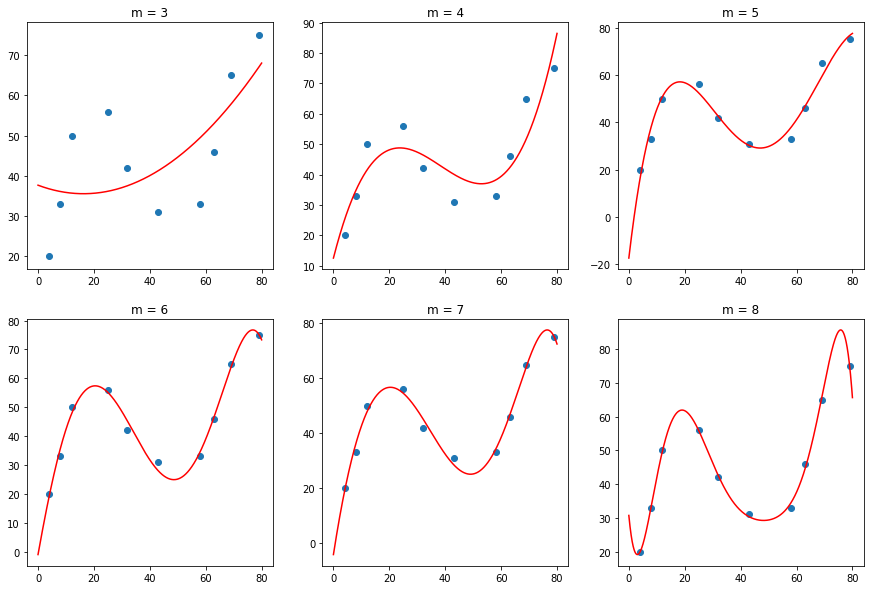

In [16]:
# 绘制拟合图像时需要的临时点
x_temp = np.linspace(0, 80, 10000)

# 绘制子图
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
m=3
for i in range(2):
    for j in range(3):
        axes[i, j].plot(x_temp, fit_func(n_poly(m), x_temp), 'r')
        axes[i, j].scatter(x, y)
        axes[i, j].set_title("m = "+str(m))
        m += 1

当 m=4（4 次多项式） 时，图像拟合的效果已经明显优于 m=3 的结果。但是随着 m 次数的增加，当 m=8 时，曲线呈现出明显的震荡，是过拟和（Overfitting）现象。

In [30]:
#使用 scikit-learn 进行多项式拟合
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = np.array(x).reshape(len(x), 1)  # 转换为列向量
y = np.array(y).reshape(len(y), 1)

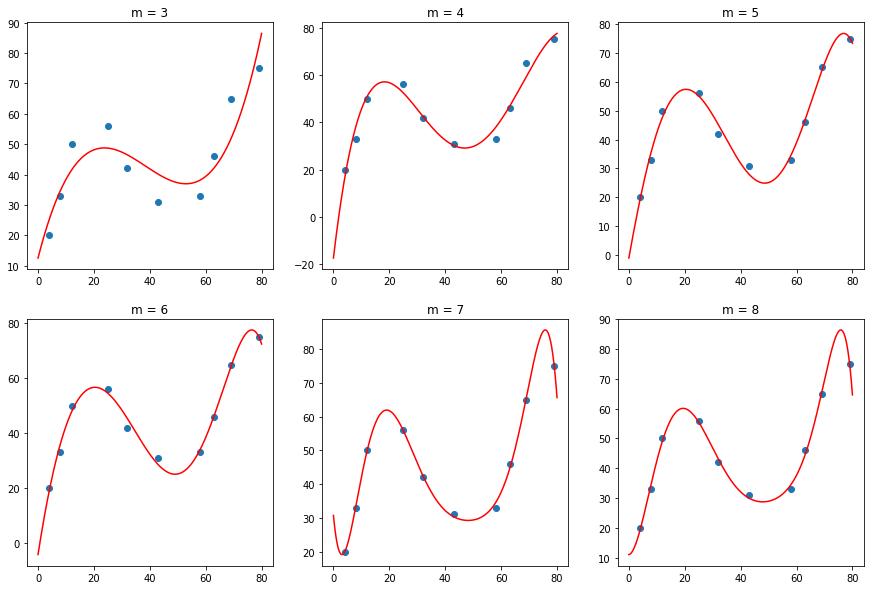

In [31]:
# 绘制拟合图像时需要的临时点(上面有了)
# x_temp = np.linspace(0, 80, 10000)

# 绘制子图
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
m = 3   
for i in range(2):
    for j in range(3):
        # 使用 sklearn 得到 m 次多项式回归特征矩阵
        poly_features = PolynomialFeatures(degree=m, include_bias=False)
        poly_x = poly_features.fit_transform(x)
        # 定义线性回归模型
        model = LinearRegression()
        model.fit(poly_x, y)  # 训练
        #绘图
        x_temp = np.array(x_temp).reshape(len(x_temp), 1)
        poly_x_temp = poly_features.fit_transform(x_temp)
        axes[i, j].plot(x_temp, model.predict(poly_x_temp), 'r')
        axes[i, j].scatter(x, y)
        axes[i, j].set_title("m = "+str(m))
        m += 1

结果同上

In [32]:
#应用
import pandas as pd

# 加载数据集
df = pd.read_csv(
    "data/vaccine.csv", header=0)
df

,Year,Values
0,1983,48.676809
1,1984,50.653151
2,1985,45.603729
3,1986,45.511160
4,1987,52.882892
5,1988,62.710162
6,1989,68.354736
7,1990,73.618808
8,1991,69.748838
9,1992,69.905091


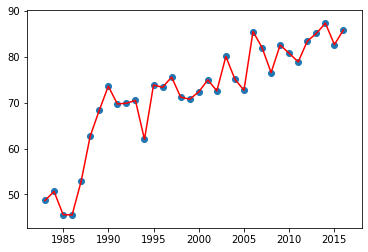

In [33]:
# 定义 x, y 的取值
x = df['Year']
y = df['Values']
# 绘图
plt.plot(x, y, 'r')
plt.scatter(x, y)

In [34]:
# 首先划分 dateframe 为训练集和测试集
train_df = df[:int(len(df)*0.7)]
test_df = df[int(len(df)*0.7):]

# 定义训练和测试使用的自变量和因变量
X_train = train_df['Year'].values
y_train = train_df['Values'].values

X_test = test_df['Year'].values
y_test = test_df['Values'].values

In [37]:
#s使用make_pipeline 将一个处理流程封装起来使用
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

X_train = X_train.reshape(len(X_train), 1)
X_test = X_test.reshape(len(X_test), 1)
y_train = y_train.reshape(len(y_train), 1)

for m in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(
        m, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)
    pre_y = model.predict(X_test)
    print("{} 次多项式回归平均绝对误差: ".format(m),
          mean_absolute_error(y_test, pre_y.flatten()))
    print("{} 次多项式均方根误差: ".format(m), mean_squared_error(y_test, pre_y.flatten()))
    print("---")

3 次多项式回归平均绝对误差:  4.547691928062872
3 次多项式均方根误差:  29.93305654903162
---
4 次多项式回归平均绝对误差:  4.424336229004736
4 次多项式均方根误差:  29.02874901931873
---
5 次多项式回归平均绝对误差:  4.341616357018756
5 次多项式均方根误差:  28.221927555583044
---


MSE 计算结果:  [43.531858295153434, 464.3290384751541, 29.93305654903162, 29.02874901931873, 28.221927555583044, 27.440821629813197, 26.712320070944738, 26.03872962238667, 25.422418033526707, 24.865818392863797]


Text(0, 0.5, 'MSE')

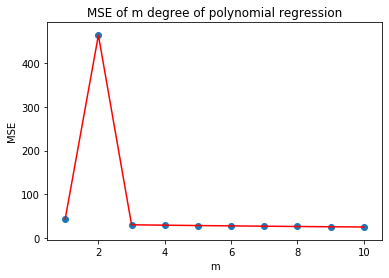

In [39]:
# 计算 m 次多项式回归预测结果的 MSE 评价指标并绘图
mse = []  # 用于存储各最高次多项式 MSE 值
m = 1  # 初始 m 值
m_max = 10  # 设定最高次数
while m <= m_max:
    model = make_pipeline(PolynomialFeatures(
        m, include_bias=False), LinearRegression())
    model.fit(X_train, y_train)  # 训练模型
    pre_y = model.predict(X_test)  # 测试模型
    mse.append(mean_squared_error(y_test, pre_y.flatten()))  # 计算 MSE
    m = m + 1

print("MSE 计算结果: ", mse)
# 绘图
plt.plot([i for i in range(1, m_max + 1)], mse, 'r')
plt.scatter([i for i in range(1, m_max + 1)], mse)

# 绘制图名称等
plt.title("MSE of m degree of polynomial regression")
plt.xlabel("m")
plt.ylabel("MSE")